<a href="https://colab.research.google.com/github/siddhartha237/MLT-Workshop/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

We will look at a toy dataset first before moving on to a more complex dataset. We will now start using functions wherever applicable so that our code is more modular and reusable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed = 42)

## Toy Dataset

### Generate Dataset

Let us first generate a dataset in $\mathbb{R}^{2}$ by sampling points from a multi-variate normal distribution.

In [ ]:
mu = np.array([2, 5])
cov = np.array([
    [1, 0.9],
    [0.9, 1]
])
n = 100
X = rng.multivariate_normal(mu, cov, n).T
X.shape

(2, 100)

### Visualise

Let us now visualise the dataset using a scatter plot.

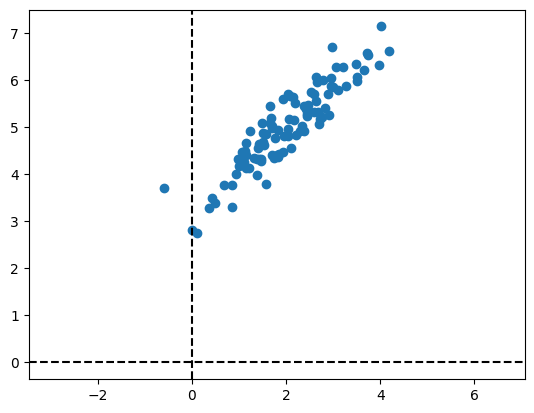

In [ ]:
d, n = X.shape
plt.scatter(X[0, :], X[1, :])
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')
plt.axis('equal');

### Center the dataset

Let us now center the dataset and visualise both the centered and the original dataset side by side.

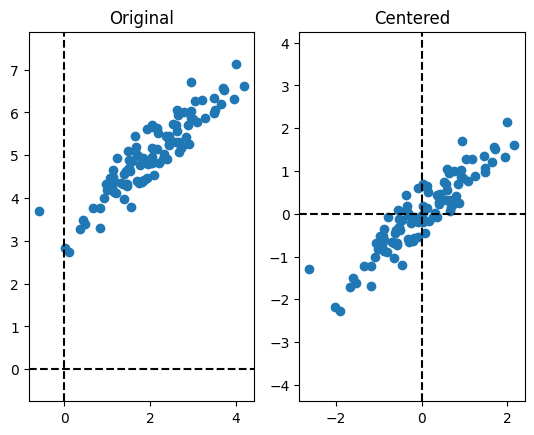

In [ ]:
# Plot the original data here
plt.subplot(1, 2, 1)
d, n = X.shape
plt.scatter(X[0, :], X[1, :])
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')
plt.axis('equal')
plt.title('Original')

# Center
mu = X.mean(axis = 1) # mean along the columns
X -= mu.reshape(2, 1) # in-place
np.allclose(X.mean(axis = 1), np.zeros(2))

# Centered dataset
plt.subplot(1, 2, 2)
d, n = X.shape
plt.scatter(X[0, :], X[1, :])
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')
plt.axis('equal')
plt.title('Centered');

### Covariance matrix

Now, we shall compute the covariance matrix.

In [ ]:
C = X @ X.T / n
C

array([[0.87218245, 0.74691674],
       [0.74691674, 0.76626231]])

### Principal components

All that remains is to find the eigenvectors of the covariance matrix, which are our principal components.

In [ ]:
eigval, eigvec = np.linalg.eigh(C)
var = np.flip(eigval)
pcs = np.flip(eigvec, axis = 1)

In [ ]:
pcs.shape

(2, 2)

### Visualize PCs

Let us visualize the principal components.

$$
w_1 = (w_{11}, w_{12})
$$

To draw a line passing through $w_1$, the slope of the line $y = m_1x$ is given by:

$$
m_1 = \frac{w_{12}}{w_{11}}
$$

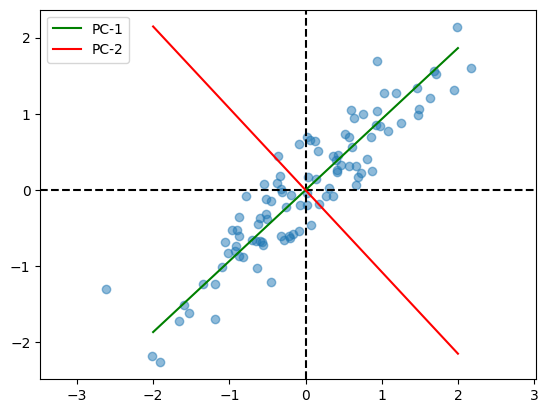

In [ ]:
d, n = X.shape
plt.scatter(X[0, :], X[1, :], alpha = 0.5)
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')
plt.axis('equal')

# PC-1
m_1 = pcs[:, 0][1] / pcs[:, 0][0] # w_12 / w_11
# PC-2
m_2 = pcs[:, 1][1] / pcs[:, 1][0] # w_22 / w_21

x = np.linspace(-2, 2)
plt.plot(x, m_1 * x, color = 'green', label = 'PC-1')
plt.plot(x, m_2 * x, color = 'red', label = 'PC-2')
plt.legend()

### Summary

We can now summarize all that we have done and express in the form of two functions.

In [ ]:
def PCA(X):
    # shape
    d, n = X.shape
    # Center
    X -= X.mean(axis = 1).reshape(d, 1)
    # Covariance matrix
    C = X @ X.T / n
    # Eigendecomposition
    eigval, eigvec = np.linalg.eigh(C) # sorted in ascending order
    # Arrange in descending
    var = np.flip(eigval)
    pcs = np.flip(eigvec, axis = 1) # columns
    return var, pcs

In [ ]:
def plot(X, pcs):
    d, n = X.shape
    plt.scatter(X[0, :], X[1, :], alpha = 0.5)
    plt.axhline(color = 'black', linestyle = '--')
    plt.axvline(color = 'black', linestyle = '--')
    plt.xlim(np.min(X[0, :]) - 0.5, np.max(X[0:, ]) + 0.5)
    plt.ylim(np.min(X[1, :]) - 0.5, np.max(X[1:, ]) + 0.5)
    plt.axis('equal')

    # PC-1
    m_1 = pcs[:, 0][1] / pcs[:, 0][0] # w_12 / w_11
    # PC-2
    m_2 = pcs[:, 1][1] / pcs[:, 1][0] # w_22 / w_21

    x = np.linspace(np.min(X[0, :]), np.max(X[0, :]))
    plt.plot(x, m_1 * x, color = 'green', label = 'PC-1')
    plt.plot(x, m_2 * x, color = 'red', label = 'PC-2')
    plt.legend()
    # Ctr + ] -> bulk indent
    # Ctr + [ -> undo bulk indent
    # Ctr + / -> bulk comment

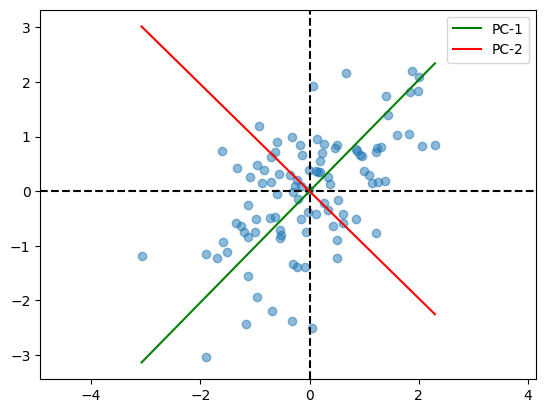

In [ ]:
mu = np.array([2, 5])
cov = np.array([
    [1, 0.5],
    [0.5, 1]
])
n = 100
X = rng.multivariate_normal(mu, cov, n).T
var, pcs = PCA(X)
plot(X, pcs)

## MNIST

Let us now run PCA on the MNIST dataset and visulize the projections on the top two PCs.

In [ ]:
from keras.datasets import mnist
train, test = mnist.load_data()
X_train, y_train = train

Instead of working with the entire dataset, let us just look at two classes.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_1 = 3
y_2 = 8
n = 200
X = np.concatenate((X_train[y_train == y_1][:n // 2],
                    X_train[y_train == y_2][:n // 2]),
                    axis = 0)

# first 100 are "y_1", next 100 are "y_2"
y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))

In [ ]:
X = X.reshape(n, -1).T
X = X.astype(float)

PCA in a space of dimension $\mathbb{R}^{784}$

In [ ]:
var, pcs = PCA(X)

In [ ]:
for k in range(784):
    if var[:k].sum() / var.sum() >= 0.95:
        break
k

79

It takes 74 PCs to capture 95% of the variance in the dataset.

We can now project the data-points onto the top two PCs and visualise the resulting projections in the form of a scatter plot.

In [ ]:
colors = np.array(['red', 'green'])
colors[y.astype(int)]

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green

(-200.0, -100.0)

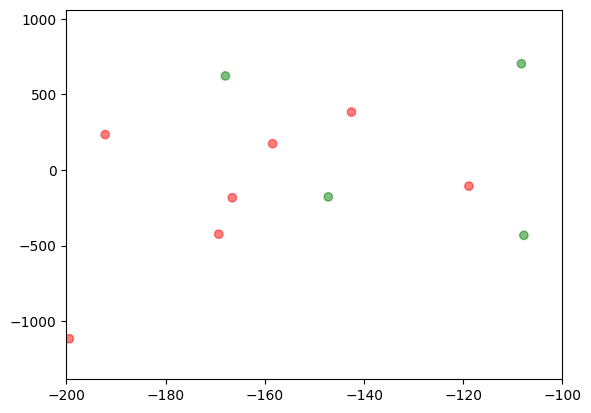

In [ ]:
W = pcs[:, :2]
X_prime = W.T @ X
X_prime.shape
colors = np.array(['red', 'green'])
plt.scatter(X_prime[0, :], X_prime[1, :],
            alpha = 0.5,
            c = colors[y.astype(int)]);
plt.xlim(-200, -100)

In [ ]:
for i in range(n):
    if((-180 < X_prime[0, i] < -140) and (-300 < X_prime[1, i] < 0)):
        print(i)

59
169


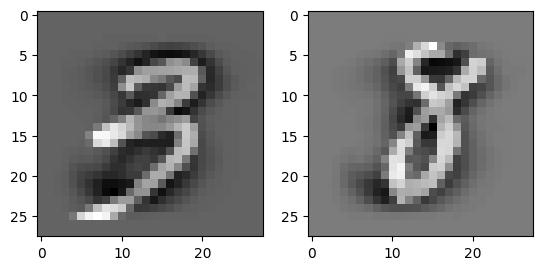

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(X[:, 59].reshape(28, 28), cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(X[:, 169].reshape(28, 28), cmap = 'gray')

This can now be used in a downstream
task such as classification. Notice the neat separation that we get even with just two principal components. This is dimensionality reduction in action.